# Hadamard Gate

## 1. Superposition

Last week we stated that a qubit can be in the basic states $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 
or in a superposition of those states: $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$.

If we apply the *Hadamard* operator, $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$, 
to $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, we get the following state:

$$
\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix}
$$

Probabilies are calculated by taking the sum of the squares of the absolute values of the amplitudes, giving a 50% chance of measuring either 0 or 1:

$$
|\frac{1}{\sqrt{2}}|^2 + |\frac{1}{\sqrt{2}}|^2 = 1
$$

Creating this in QISKIT, we construct the circuit below:

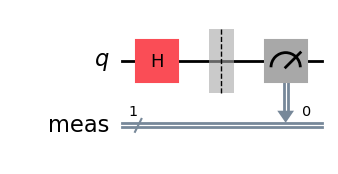

In [1]:
from qiskit import QuantumCircuit
# Create a new circuit with one qubit and add a Hadamard gate to qubit 0
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

Measuring the state of the qubit, we now see roughly 50% split between $|0>$ and $|1>$.

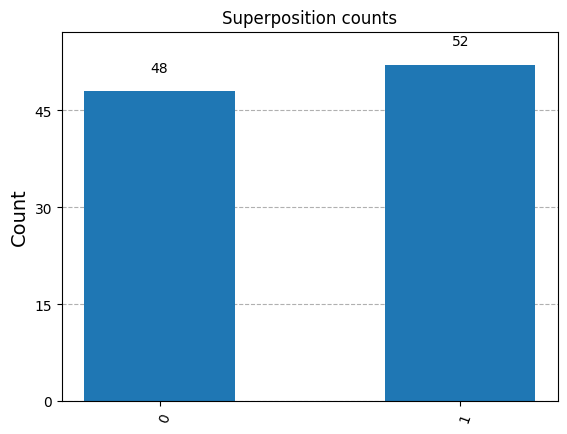

In [2]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Simulator backend
backend = AerSimulator()

# Run and get counts
result = backend.run(qc, shots=100).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Superposition counts')

## 2. Entanglement and Bell States

John Bell proved that the *spooky action at a distance* that Einstien, Podolsky & Rosen first pointed out, has a correlation that is stronger that could exist in classical systems.  
Bell's 1964 experiment proved that there was no hidden variable being shared between the entangled qubits.

Measuring one qubit, in an entangled state, instantaneously determines the value of the other.  
From his experiment he showed four unique distinguishable orthogonal entangled states that are often called the Bell states
($\Phi^+, \Phi^-, \Psi^+, \Psi^-$) of the four-dimensional Hilbert space for two qubits:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \\
|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \\
|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \\
|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)
$$

* Bell states are maximally entangled states showing quantum correlations.

* Measuring one qubit alone gives a maximally mixed state (identity matrix), revealing no information.

* Measuring correlated observables (e.g., $\langle X_1 X_2\rangle$​, $\langle Z_1 Z_2\rangle$) distinguishes Bell states.



## How do we put two qubits into one of these maximally entagled states?

We have seen a simple circuit with a *Hadamard Gate* and a *Controlled Not (CNOT)* gate.

$$
CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0  & 1 & 0 \end{bmatrix}
$$

The Hadamard operator and the CNOT gate to generate the first Bell state $\Phi^+$ given both qubits start in the $|00\rangle$ initial state.

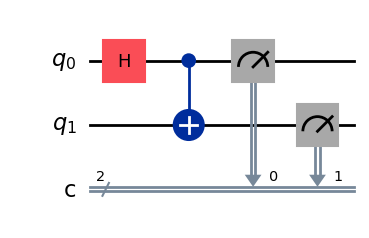

In [3]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc_bell = QuantumCircuit(2, 2)
 
# Add a Hadamard gate to qubit 0
qc_bell.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc_bell.cx(0, 1)
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

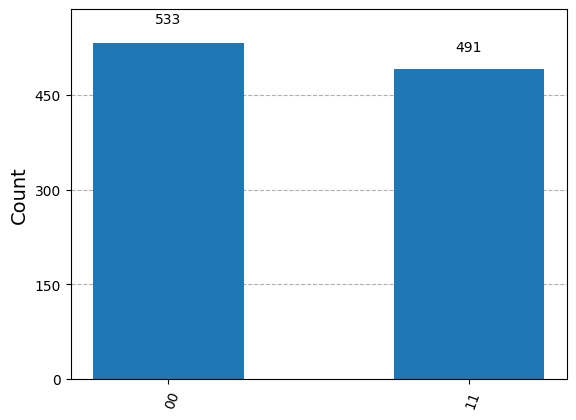

In [4]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

## 2. Quantum computations are reversible

All quantum circuits - unitary transformations - are reversible, and we can get the initial conditions from any quantum system.

If we want to recover the initial conditions, we apply the gates in the reverse order:

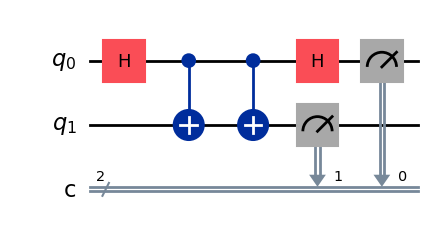

In [5]:
from qiskit import QuantumCircuit
# Create a new circuit with two qubits
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0 and  a controlled-X gate on qubit 1, controlled by qubit 0
qc.h(0)         
qc.cx(0, 1)     # Create entanglement

 # Reverse the circuit
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])
qc.draw("mpl")

We end up in the initial |00> state with 100% probability:

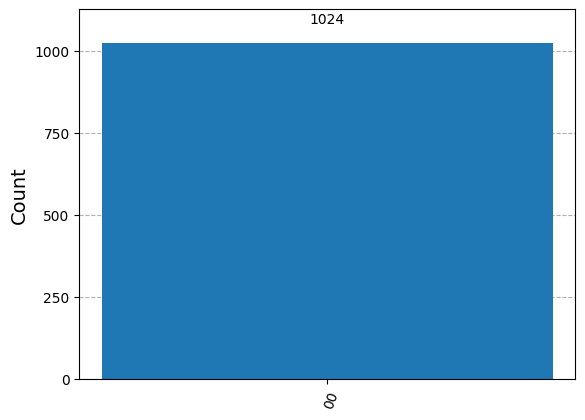

In [6]:
# Simulate
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())

If we gave Bob a pair of entangled qubits in some unknown Bell state, 
all they would have to do to recover the initial conditions is to simply apply the CNOT and Hadamard gates to the pair of qubits. 

## 3. Superdense Encoding

As desciibed in `Nielsen:2000` (Nielsen & Chuang pp97-98), it involves two parties, Alice and Bob, who are a long way from each other.  
The goal in to transmit some classical information from Alice to Bob.
We can show how Alice can send two classical bits of information to Bob by sending only one single qubit.

In the initial setup, Alica and Bob share a pair of quibits in the entagled stat $|\psi\rangle = $ $ \frac{|00 \rangle + |11\rangle}{\sqrt{2}}$.

Alice is in possession of the first qubit, and Bob has position of the second.

If Alice can apply a transform to her qubit and then send it to Bob, Bob now having an unknown Bell state all he would have to do to recover the initial conditions is to simply apply the CNOT and Hadamard gates to the pair of qubits.

### Sending state 01

Starting in the joint bell state above $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$, 
if we apply the Pauli X operertor $\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$,
we get the state $\frac{1}{\sqrt{2}}(|10\rangle + |01\rangle)$,

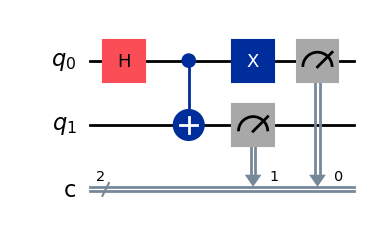

In [7]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)        # Create entanglement
qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0

qc_bell.x(0)             # Apply the (X) operator to qubit 0 to change the Bell state

qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

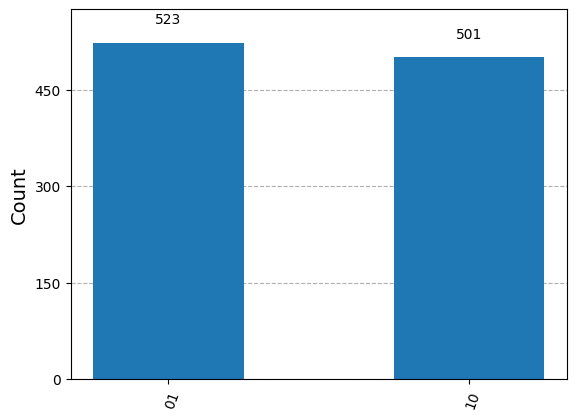

In [8]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

Before reversal, we have an maximal entagled state.

Reverse the Hadamard and CNOT to reveal the message:

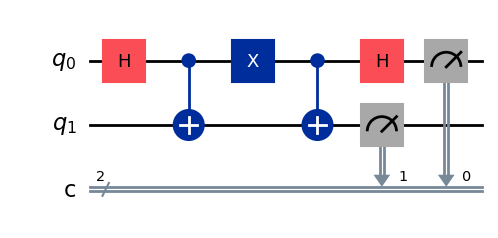

In [9]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)        # Create entanglement
qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0

qc_bell.x(0)        # Apply the (X) operator to qubit 0 to change the Bell state

qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc_bell.h(0)        # Create entanglement
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

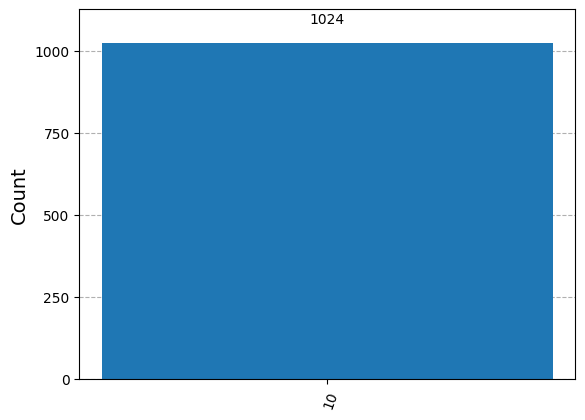

In [10]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

### Sending state 01

We apply the Z-operator $\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$, to give the state $\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$.

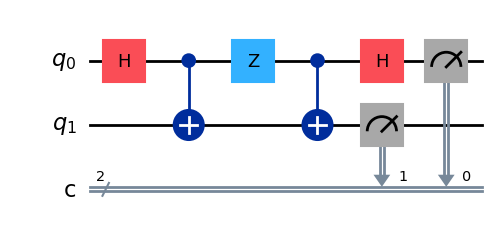

In [11]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)        # Create entanglement
qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0

qc_bell.z(0)        # Apply the (Z) operator to qubit 0 to change the Bell state

qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc_bell.h(0)        # Create entanglement
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

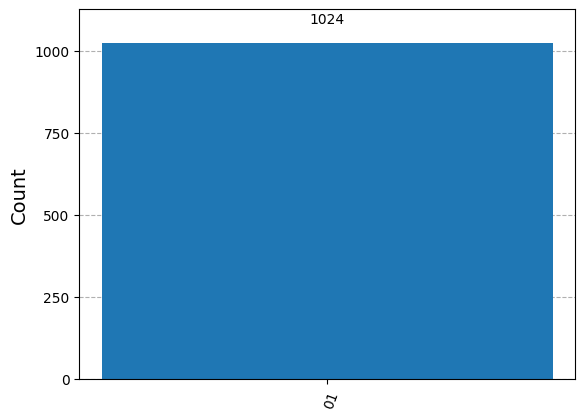

In [12]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

### Sending state 11:

Apply the X-operator then the Z-operator to get the bell state $\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$.

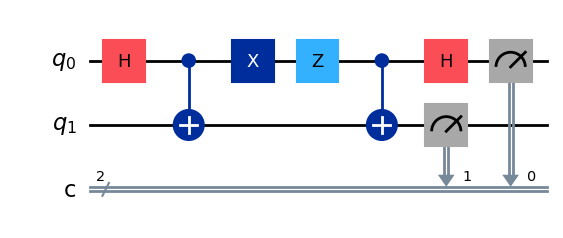

In [13]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)        # Create entanglement
qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0

qc_bell.x(0)        # Apply the (XZ) operator to qubit 0 to change the Bell state
qc_bell.z(0)

qc_bell.cx(0, 1)    # Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc_bell.h(0)        # Create entanglement
qc_bell.measure([0, 1], [0, 1])
qc_bell.draw("mpl")

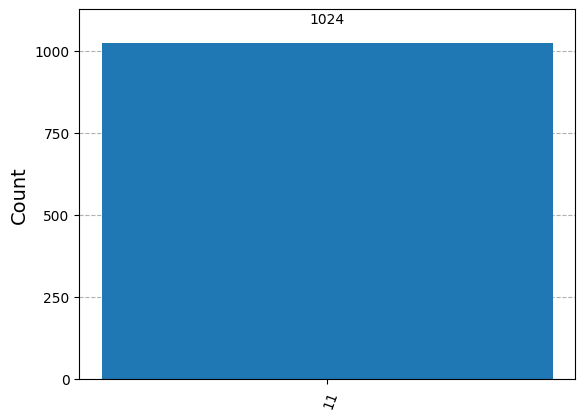

In [14]:
# Simulate
backend = AerSimulator()
result = backend.run(qc_bell, shots=1024).result()
plot_histogram(result.get_counts())

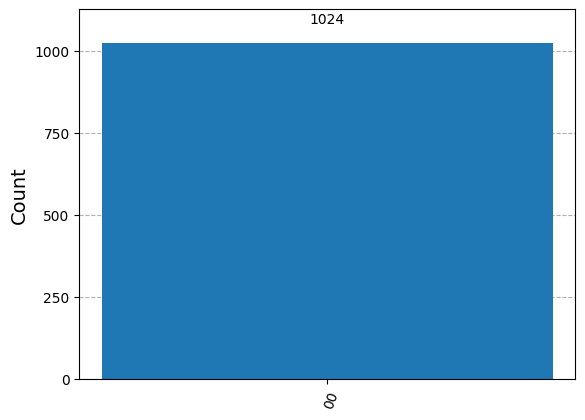

In [15]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0 and  a controlled-X gate on qubit 1, controlled by qubit 0
qc.h(0)
qc.cx(0, 1)

# Alice encodes her message
# 00 ; do nothing
# 01 : apply X
# 10 : apply Z
# 11 : apply XZ
#qc.x(0)
#qc.z(0)

# Reverse
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])
qc.draw("mpl")

# Simulate
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
plot_histogram(result.get_counts())